# **Extracting Data from FRED (Federal Reserve St. Louis)**

In [1]:
from fredapi import Fred

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Initialize the API

api_key = '7555a6d51dfce1dbb631286fe1d4fa46'
fred = Fred(api_key=api_key)

# ICE BofA US High Yield Index Option-Adjusted Spread

In [4]:
dataHY = fred.get_series('BAMLH0A0HYM2', start_date='2000-01-01', end_date='2024-11-01')
print(dataHY)

1996-12-31    3.13
1997-01-01     NaN
1997-01-02    3.06
1997-01-03    3.09
1997-01-06    3.10
              ... 
2024-12-13    2.68
2024-12-16    2.69
2024-12-17    2.75
2024-12-18    2.73
2024-12-19    2.91
Length: 7393, dtype: float64


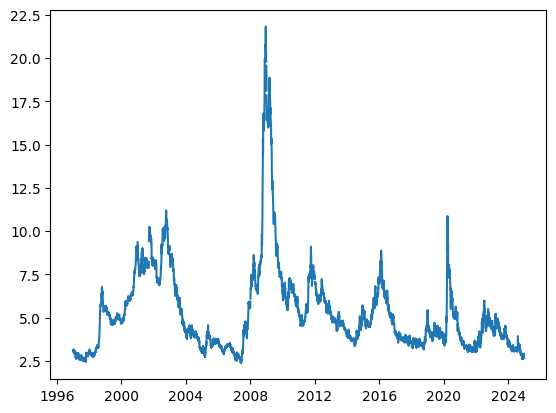

In [5]:
plt.plot(dataHY)

In [6]:
# Turn data into a dataframe

dataHY = dataHY.to_frame()
dataHY = dataHY.reset_index()
dataHY.columns = ['Date', 'High Yield Spread']
dataHY

,Date,High Yield Spread
0,1996-12-31,3.13
1,1997-01-01,NaN
2,1997-01-02,3.06
3,1997-01-03,3.09
4,1997-01-06,3.10
...,...,...
7388,2024-12-13,2.68
7389,2024-12-16,2.69
7390,2024-12-17,2.75
7391,2024-12-18,2.73


In [7]:
dataHY = dataHY[dataHY['Date'] >= '2000-09-18']
dataHY

,Date,High Yield Spread
981,2000-09-18,6.35
982,2000-09-19,6.41
983,2000-09-20,6.43
984,2000-09-21,6.45
985,2000-09-22,6.50
...,...,...
7388,2024-12-13,2.68
7389,2024-12-16,2.69
7390,2024-12-17,2.75
7391,2024-12-18,2.73
